In [1]:
from concept_generalization import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
# Example usage
center_list = [[0,0,0], [0,0,1], [0,1,0], [1,0,0]]
var_list = [ [[0.01, 0, 0], [0, 0.01, 0], [0, 0, 0.01] ]]*4
n = 100

samples = sampling(center_list, var_list, n)

In [3]:
def visualize_3d_samples(samples, center_list, n):
    """
    Visualize the sampled points in 3D.

    Parameters:
    - samples: NumPy array of shape (num_points, 3), sampled Gaussian points.
    - center_list: List of cluster centers to assign colors.
    - n: Number of samples per cluster.
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Assign colors based on clusters
    colors = []
    num_clusters = len(center_list)
    for i in range(num_clusters):
        colors.extend([i] * n)  # Each cluster gets a unique color

    colors = np.array(colors)

    # Plot the samples
    ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c=colors, cmap='viridis', alpha=0.6)

    # Labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('3D Visualization of Sampled Gaussian Clusters')

    plt.show()


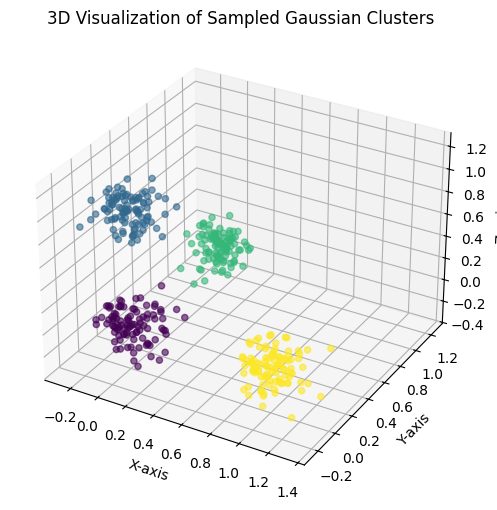

In [4]:
visualize_3d_samples(samples, center_list, n)

In [5]:
hidden_dim = [500]  # Number of hidden neurons
activation_type = 'ReLU'  # Use 'linear' or 'ReLU'

# Train the MLP
trained_model, loss_history = train_mlp(samples, hidden_dim, activation_type)

Epoch 0: Loss = 2506.1498
Epoch 50: Loss = 1.5482
Epoch 100: Loss = 0.4382
Epoch 150: Loss = 0.2203
Epoch 200: Loss = 0.1350
Epoch 250: Loss = 0.0938
Epoch 300: Loss = 0.0726
Epoch 350: Loss = 0.0608
Epoch 400: Loss = 0.0540
Epoch 450: Loss = 0.0492
Converged at epoch 471, loss: 0.0478


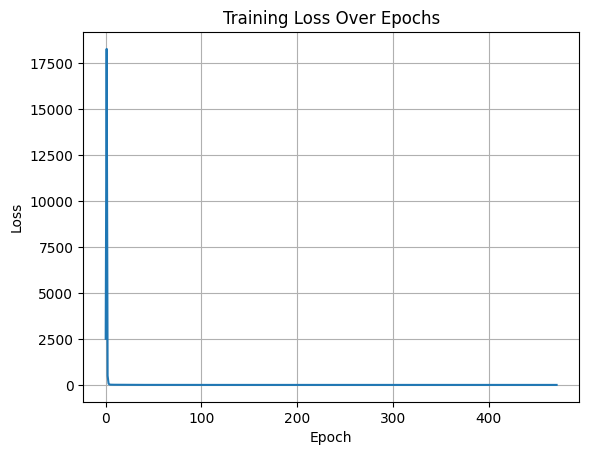

In [6]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

In [7]:
weights = {}

for name, param in trained_model.named_parameters():
    weights[name] = param.data
    print(f"Layer: {name}")
    print(param.data)  # Print the actual learned values
    print("-" * 50)

Layer: model.0.weight
tensor([[-0.0557, -0.0580,  0.2878],
        [-0.4651, -0.4446, -0.1590],
        [ 0.1702, -0.4357, -0.0483],
        ...,
        [-0.5215, -0.1377,  0.2265],
        [-0.0236, -0.0053,  0.1030],
        [-0.4798, -0.3512, -0.2599]], device='cuda:0')
--------------------------------------------------
Layer: model.2.weight
tensor([[ 0.0292,  0.0244,  0.0323,  ...,  0.0006, -0.0363,  0.0330],
        [ 0.0697, -0.0191, -0.0471,  ..., -0.0019, -0.0033,  0.0098],
        [ 0.0558, -0.0190, -0.0052,  ...,  0.0110,  0.0597,  0.0008]],
       device='cuda:0')
--------------------------------------------------


In [8]:
layer_names = list(weights.keys())
W1 = weights[layer_names[0]]  # First layer weights
W2 = weights[layer_names[1]]  # Second layer weights
torch.matmul(W2, W1)

tensor([[1.9829, 0.0187, 0.0125],
        [0.0587, 2.0398, 0.0320],
        [0.0416, 0.0435, 2.0258]], device='cuda:0')

In [9]:
# Define test points
test_points = [[1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0], [0, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0]]

# Run the function on the trained model
predictions = test_model(trained_model, test_points)


For test point [1, 1, 1], the model predicts [0.6976141  0.6627552  0.76144457]
For test point [0, 1, 1], the model predicts [0.0085691  0.96019423 1.0092651 ]
For test point [1, 0, 1], the model predicts [0.85186434 0.02702931 0.95397305]
For test point [1, 1, 0], the model predicts [ 0.8511275   0.8750662  -0.00757354]
For test point [0, 0, 0], the model predicts [0. 0. 0.]
For test point [0, 0, 1], the model predicts [-0.0013106  -0.00143008  0.99893314]
For test point [1, 0, 0], the model predicts [ 1.0037425e+00  4.3637492e-04 -1.2031710e-03]
For test point [0, 1, 0], the model predicts [-8.8106748e-04  9.9966496e-01  1.3140142e-03]


In [10]:
hidden_dim = [6]  # Number of hidden neurons
activation_type = 'ReLU'  # Use 'linear' or 'ReLU'

# Train the MLP
trained_model, loss_history = train_mlp(samples, hidden_dim, activation_type)

Epoch 0: Loss = 370.0750
Epoch 50: Loss = 5.9483
Epoch 100: Loss = 4.7212
Epoch 150: Loss = 3.6462
Epoch 200: Loss = 3.0135
Epoch 250: Loss = 2.7762
Epoch 300: Loss = 2.5791
Epoch 350: Loss = 1.7518
Epoch 400: Loss = 1.2663
Epoch 450: Loss = 1.1357
Epoch 500: Loss = 1.0629
Epoch 550: Loss = 1.0093
Epoch 600: Loss = 0.9654
Epoch 650: Loss = 0.9262
Epoch 700: Loss = 0.8903
Epoch 750: Loss = 0.8558
Epoch 800: Loss = 0.8229
Epoch 850: Loss = 0.7933
Epoch 900: Loss = 0.7666
Epoch 950: Loss = 0.7427


In [11]:
weights = {}

for name, param in trained_model.named_parameters():
    weights[name] = param.data
    print(f"Layer: {name}")
    print(param.data)  # Print the actual learned values
    print("-" * 50)

Layer: model.0.weight
tensor([[-0.1451, -0.7116, -0.0833],
        [ 1.0892,  0.1969,  0.2220],
        [ 0.2538,  0.1904,  1.1099],
        [ 0.2099,  1.0283,  0.1505],
        [-0.3476, -0.4882, -0.3019],
        [-0.1101, -0.0889, -0.6967]], device='cuda:0')
--------------------------------------------------
Layer: model.2.weight
tensor([[-0.3599,  0.9909, -0.1771, -0.1582,  0.0870,  0.0744],
        [-0.6242, -0.1733, -0.1054,  1.0266, -0.1187, -0.1415],
        [-0.2417, -0.1966,  0.9610, -0.1412, -0.1325, -0.5874]],
       device='cuda:0')
--------------------------------------------------


In [12]:
# Define test points
test_points = [[1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0],[0, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0]]

# Run the function on the trained model
predictions = test_model(trained_model, test_points)

For test point [1, 1, 1], the model predicts [0.9994341 1.0004432 1.0009508]
For test point [0, 1, 1], the model predicts [-0.00166437  1.0005189   1.0008233 ]
For test point [1, 0, 1], the model predicts [ 1.0007393  -0.00104281  1.0018516 ]
For test point [1, 1, 0], the model predicts [ 9.9979335e-01  1.0014101e+00 -7.7310205e-04]
For test point [0, 0, 0], the model predicts [0. 0. 0.]
For test point [0, 0, 1], the model predicts [-3.5921670e-04 -9.6698105e-04  1.0017240e+00]
For test point [1, 0, 0], the model predicts [ 1.0010984e+00 -7.5832009e-05  1.2762472e-04]
For test point [0, 1, 0], the model predicts [-1.3051331e-03  1.0014861e+00 -9.0074539e-04]
